In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.shape

(1067, 13)

In [3]:
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


Sample data/ dataset
- Features: Columns có ích đối với đầu ra,
- Sample/ Data points: Rows

![](https://datalya.com/blog/content/4-machine-learning/11-machine-learning-vs-traditional-programming-paradigm/ml_vs_traditional_paradigm.png)

#### Sanity check

In [4]:
df.shape

(1067, 13)

In [5]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.memory_usage().sum() / 1024

108.4921875

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


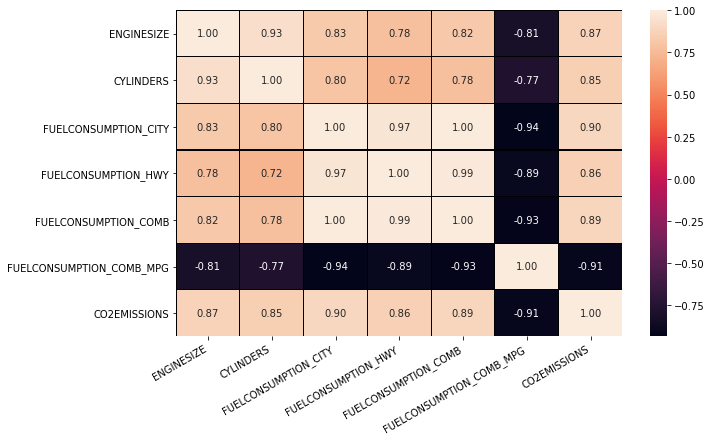

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df.drop(columns='MODELYEAR').corr(), fmt='.2f', annot=True, linewidths=0.1, linecolor='black');
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

- Percentile: thứ tự điểm dữ liệu đứng (%)
- Quantile: Giá trị tại vị trí percentile

- Percentile: 0%, 25%, 50%, 75%, 100%:
- Quartile, Decile

![](https://www.researchgate.net/profile/Bruno-Drolet/publication/327510262/figure/fig7/AS:668235196293122@1536331094212/Examples-of-quantile-regression-with-predictions-at-selected-quantiles-The-10-25.png)

Central tendency: Mean, Mode, Median
- Mode: Giá trị với tần suất xuất hiện nhiều nhất.
- Median: Giá trị chính giữa của bộ data (50 % số lượng điểm dữ liệu > nó, 50% số lượng điểm dữ liệu bé hơn nó) --> Robust
- Mean: Trung bình đại số (arithmetic) --> Tổng các giá trị / số lượng 

![](https://cdn.vietnambiz.vn/2020/4/10/arithmetic-mean-formula-1586510924205324510805.jpg)

Spread / Fluctuation Measurement:
- Variance / Standard Deviation
- Covariance: relationship of 2 random variables

![](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/sample-variance-formula-1612435647.png)

![](https://cdn.educba.com/academy/wp-content/uploads/2019/05/Covariance-Formula.jpg)

![](https://cdn.vietnambiz.vn/thumb_w/600/2019/11/4/negative-and-positive-covariance-1572830532669957900222-crop-15728306307301475437518.png)

#### Correlation coefficient

![](https://editor.analyticsvidhya.com/uploads/39170Formula.JPG)

![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [11]:
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


- Figure: Khung --> Tăng kích cỡ
- Axes: Tấm ảnh --> Những thứ được vẽ lên

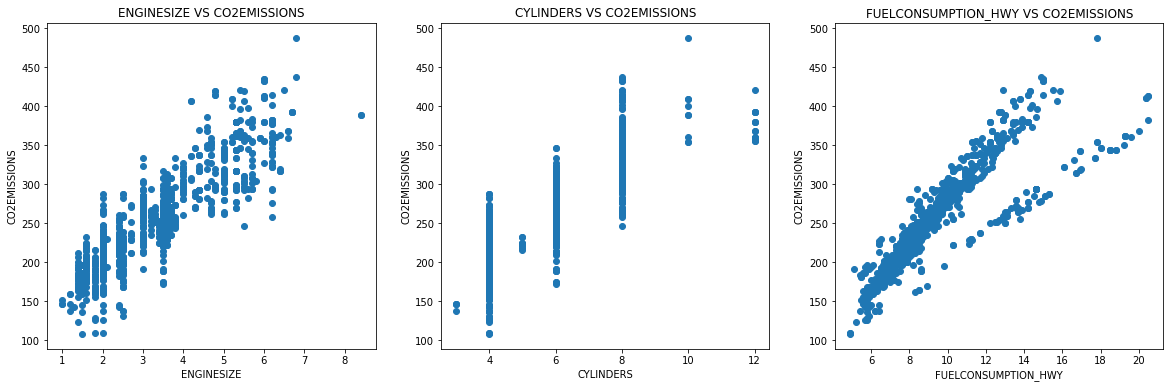

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].scatter(df.ENGINESIZE, df.CO2EMISSIONS)
ax[0].set(xlabel='ENGINESIZE', ylabel='CO2EMISSIONS', title='ENGINESIZE VS CO2EMISSIONS')

ax[1].scatter(df.CYLINDERS, df.CO2EMISSIONS)
ax[1].set(xlabel='CYLINDERS', ylabel='CO2EMISSIONS', title='CYLINDERS VS CO2EMISSIONS')

ax[2].scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS)
ax[2].set(xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS', title='FUELCONSUMPTION_HWY VS CO2EMISSIONS')

plt.show()

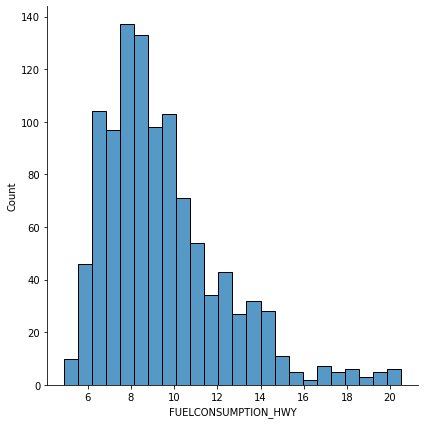

In [13]:
sns.displot(data=df, x='FUELCONSUMPTION_HWY', kind='hist', height=6, );

### Simple Linear Regression

- Linear Regression
- Logistic Regression

In [58]:
cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']
sub_cols = ['ENGINESIZE', 'CO2EMISSIONS']
train_df = df[cols]

In [59]:
train_df.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,6.7,196
1,2.4,4,7.7,221


In [60]:
train_df.shape

(1067, 4)

Machine Learning: Generalization + Computing Power --> 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### No reasonable

In [61]:
# Training model
model = LinearRegression()
model.fit(train_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY']], train_df.CO2EMISSIONS)

LinearRegression()

In [62]:
model

LinearRegression()

In [63]:
model.coef_

array([11.73071027,  9.52839063, 10.47283832])

In [64]:
model.intercept_

62.53359704782781

In [65]:
y_predicted = model.predict(train_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY']])

In [66]:
pd.DataFrame({'actual': train_df.CO2EMISSIONS, 'predicted': y_predicted})

,actual,predicted
0,196,194.276597
1,221,209.441719
2,136,178.985687
3,255,256.064255
4,244,251.875120
...,...,...
1062,271,257.529887
1063,264,256.734178
1064,271,257.529887
1065,260,254.639610


In [67]:
mean_squared_error(train_df.CO2EMISSIONS, y_predicted)

574.9070575158319

In [68]:
mean_absolute_error(train_df.CO2EMISSIONS, y_predicted)

17.485910222683852

In [69]:
r2_score(train_df.CO2EMISSIONS, y_predicted) * 100

85.67133084792763

### Evaluation way

![](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

#### K-folds

![Cross validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(train_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY']], df.CO2EMISSIONS, 
                                                    test_size=0.2, shuffle=True, random_state=4)

In [72]:
# Training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
model.coef_

array([11.18780738,  9.6726911 , 10.55395153])

In [74]:
model.intercept_

62.48270527375121

In [79]:
y_predicted = model.predict(X_test)

In [96]:
df_result = pd.DataFrame({'actual': y_test, 'predicted': y_predicted})
df_result['squared_error'] = df_result.eval("(actual - predicted)**2")
df_result['error'] = df_result.eval("actual - predicted")

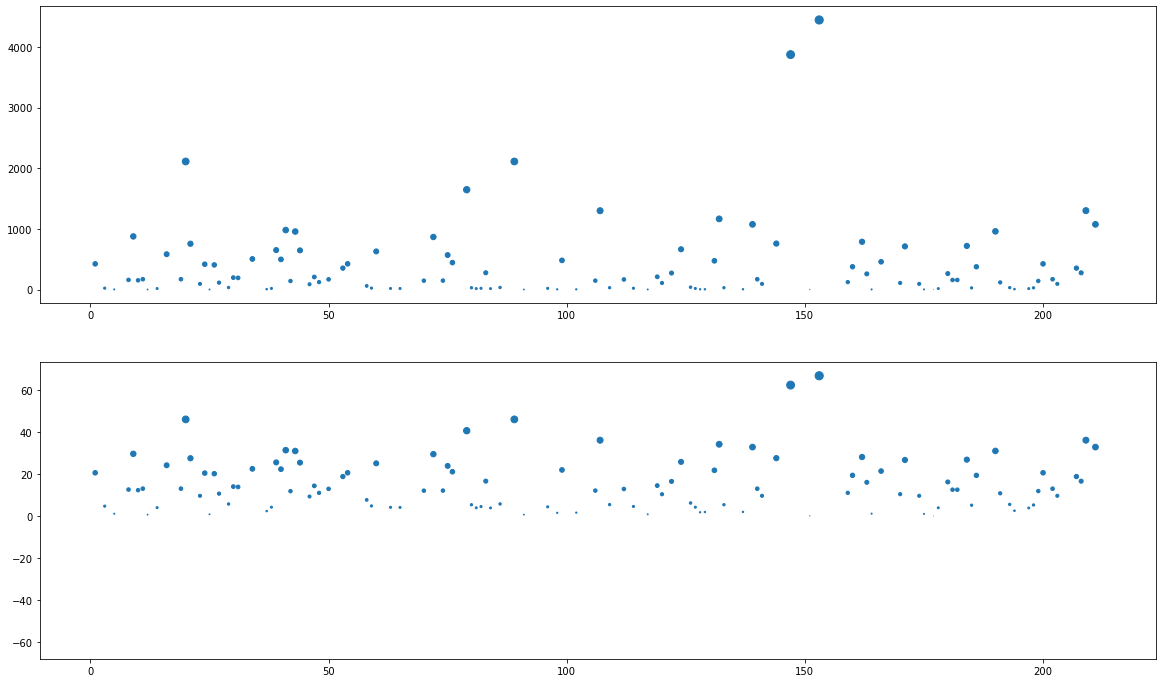

In [97]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
ax[0].scatter(range(df_result.shape[0]), df_result.squared_error, s=df_result.error, label="Squared Error")
ax[1].scatter(range(df_result.shape[0]), df_result.error, s=df_result.error, label="Error");

In [101]:
df_engine = pd.DataFrame({'ENGINESIZE': X_test.ENGINESIZE, 'y_predicted': y_predicted})
df_engine.sort_values(by='ENGINESIZE', ascending=False, inplace=True)

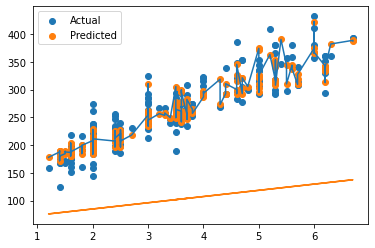

In [112]:
plt.scatter(X_test.ENGINESIZE, y_test, label='Actual')
plt.scatter(X_test.ENGINESIZE, y_predicted, label='Predicted')

df = pd.DataFrame({'engine': X_test.ENGINESIZE, 'predicted': y_predicted}).sort_values('engine', ascending=False)
plt.plot(df.engine, df.predicted)

plt.plot(X_test.ENGINESIZE, 
         model.coef_[0] * X_test.ENGINESIZE + model.intercept_)
plt.legend(loc='best')
plt.show()

In [82]:
mean_squared_error(y_test, y_predicted)

429.32421598485786

In [83]:
mean_absolute_error(y_test, y_predicted)

15.119431390528096

In [85]:
r2_score(y_test, y_predicted) * 100

88.4381539143933